# Disaggregation of appliances from generated load profiles

## Open questions:
- Does an appliance count as 'on' if it is active at _any_ time within a given window?

In [36]:
# General libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Scripts
import utils

pd.set_option("display.precision", 10)
pd.set_option("display.max_columns", 500)

%matplotlib inline

In [37]:
# Constants
DATA_PATH = "data/test"
MODEL_PATH = "models/" + DATA_PATH.split("/")[-1]

In [38]:
df = pd.read_csv(f"{DATA_PATH}/data_reduced.csv", index_col=0)
df

c:\users\allen\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Electricity.Timestep,Time,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine,Power
0,0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-01-01 00:00:01,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-01-01 00:00:02,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-01-01 00:00:03,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-01-01 00:00:04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1048570,1048570,2021-01-13 03:16:10,0.0,0.0,0.0,0.0,0.0,0.0
1048571,1048571,2021-01-13 03:16:11,0.0,0.0,0.0,0.0,0.0,0.0
1048572,1048572,2021-01-13 03:16:12,0.0,0.0,0.0,0.0,0.0,0.0
1048573,1048573,2021-01-13 03:16:13,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df = df.rename(columns={"Power": "Energy"})
df

,Electricity.Timestep,Time,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine,Energy
0,0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-01-01 00:00:01,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-01-01 00:00:02,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-01-01 00:00:03,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-01-01 00:00:04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1048570,1048570,2021-01-13 03:16:10,0.0,0.0,0.0,0.0,0.0,0.0
1048571,1048571,2021-01-13 03:16:11,0.0,0.0,0.0,0.0,0.0,0.0
1048572,1048572,2021-01-13 03:16:12,0.0,0.0,0.0,0.0,0.0,0.0
1048573,1048573,2021-01-13 03:16:13,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
appliances = ["Stove", "Coffee_machine", "Microwave", "Dishwasher", "Washing_machine"]
appliances_power = appliances + ["Energy"]
appliances_power

['Stove',
 'Coffee_machine',
 'Microwave',
 'Dishwasher',
 'Washing_machine',
 'Energy']

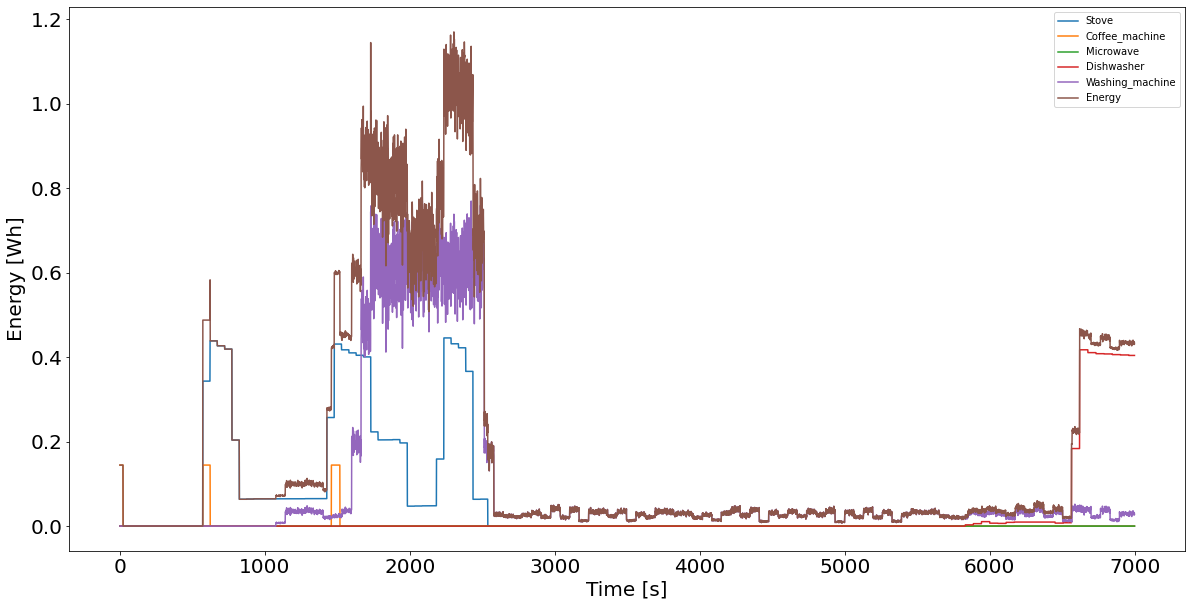

In [42]:
# plt.ylabel("Power [Wh]", fontsize=20)
# plt.xlabel("Time [s]", fontsize=20)
ax = (
    df.iloc[28000:35000]
    .mul(1000)
    .plot(y=appliances_power, figsize=(20, 10), use_index=False, fontsize=20)
)
ax.set_ylabel("Energy [Wh]", fontsize=20)
ax.set_xlabel("Time [s]", fontsize=20)
plt.savefig("target aggregation.png", bbox_inches="tight")

<AxesSubplot:>

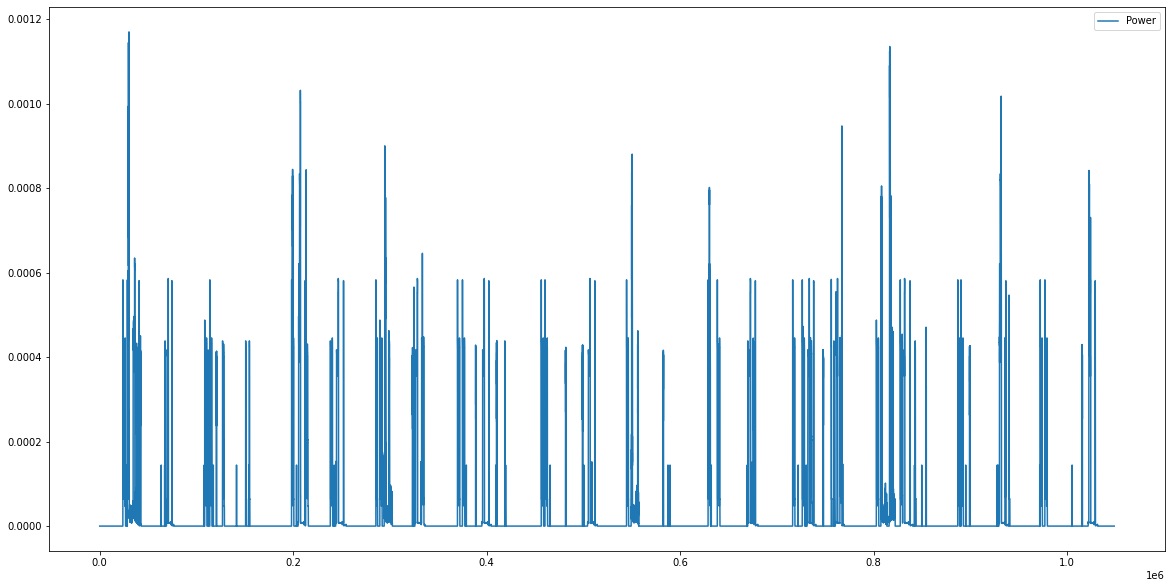

In [6]:
df.plot(y=["Power"], figsize=(20, 10))

## Stove

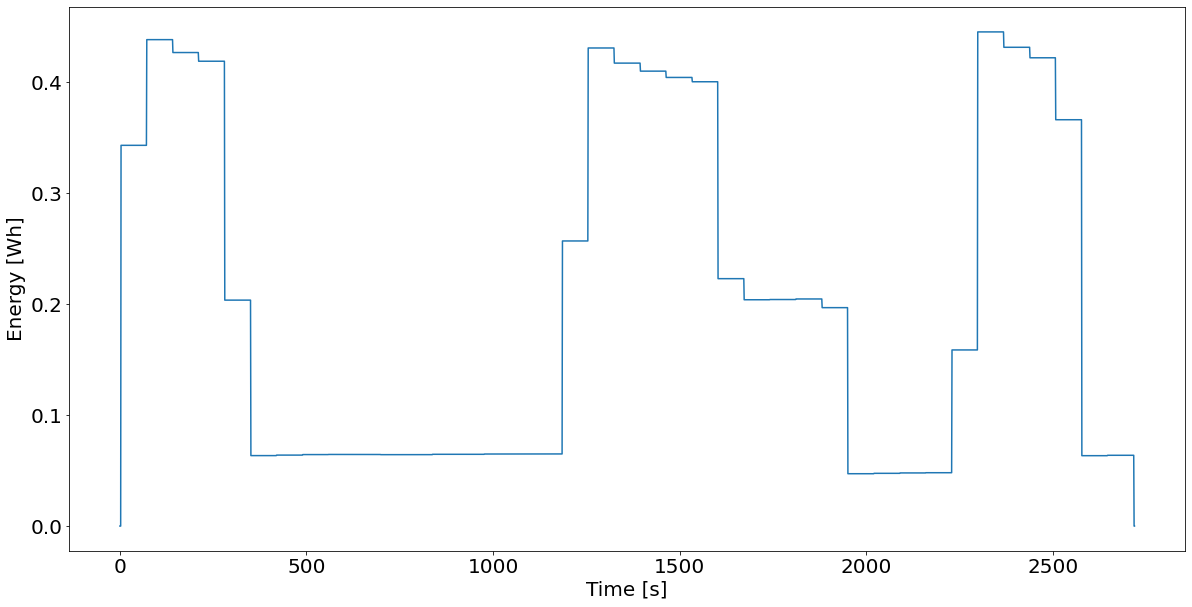

In [43]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Stove"].iloc[23950:26670].mul(1000).plot(
    y=appliances, figsize=(20, 10), use_index=False, fontsize=20
)
plt.savefig("stove.png", bbox_inches="tight")

## Microwave

In [8]:
38680 - 37990

690

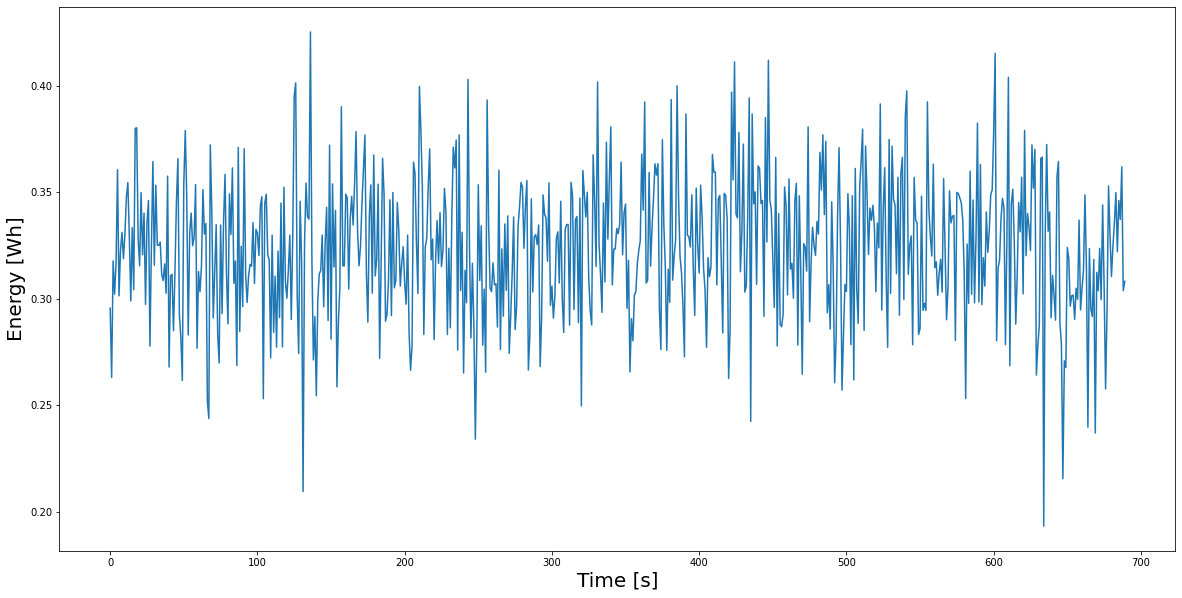

In [44]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Microwave"].iloc[37990:38680].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)
plt.savefig("microwave_1.png", bbox_inches="tight")

In [10]:
42581 - 42011

570

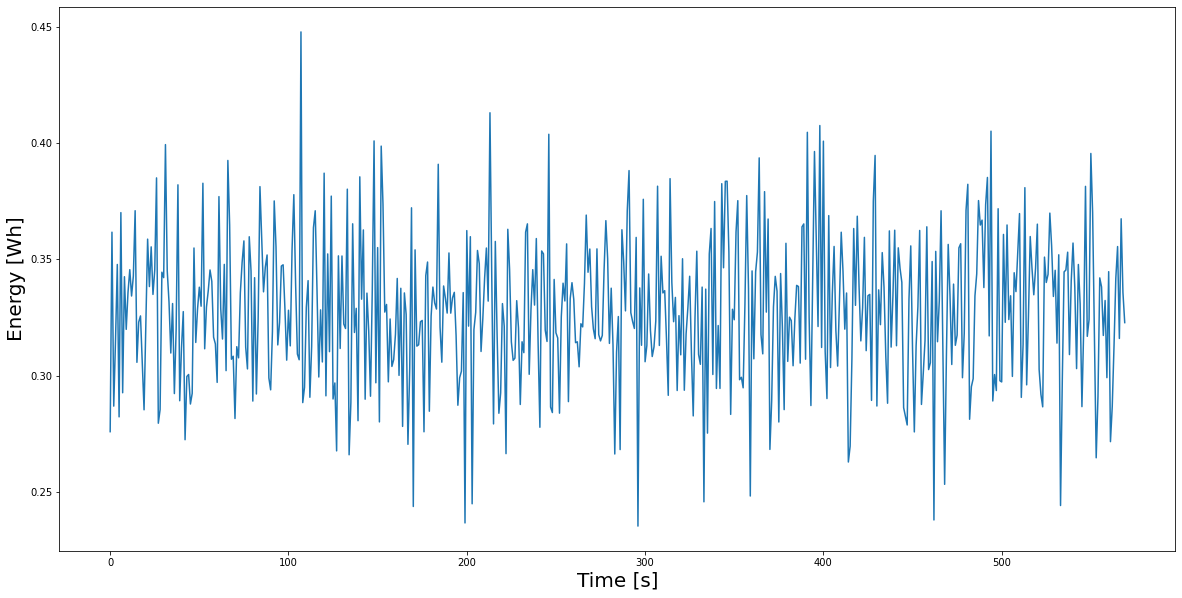

In [45]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Microwave"].iloc[42011:42581].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)
plt.savefig("microwave_2.png", bbox_inches="tight")

## Coffee machine

In [12]:
24024 - 23952

72

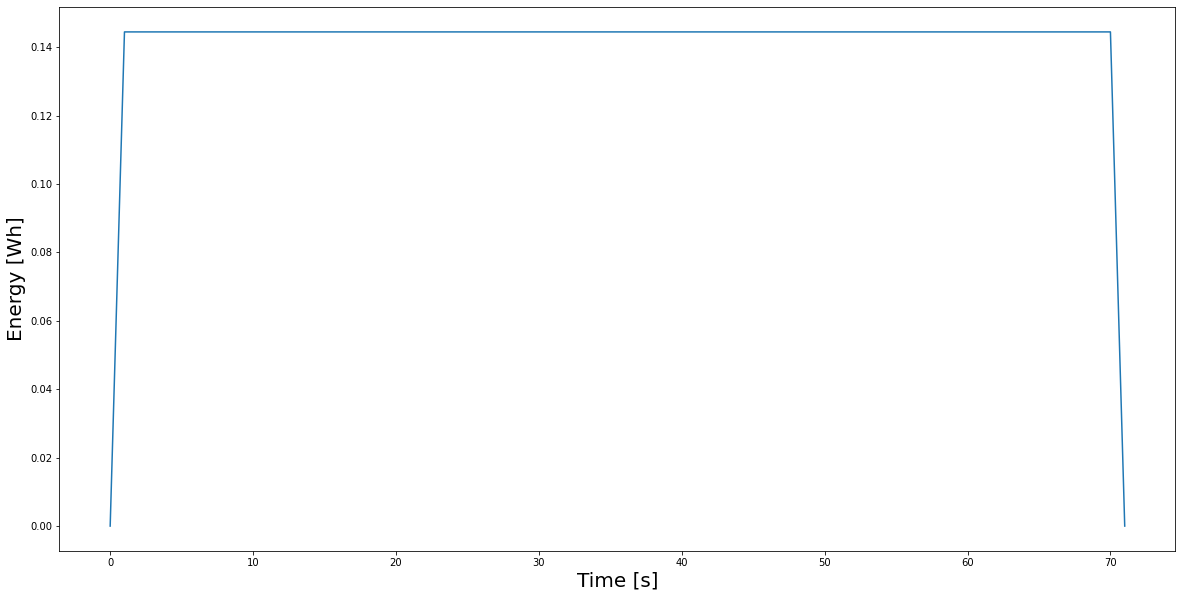

In [46]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Coffee_machine"].iloc[23952:24024].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)
plt.savefig("Coffee_machine.png", bbox_inches="tight")

In [14]:
28023 - 27959

64

<AxesSubplot:xlabel='Time [s]', ylabel='Energy [Wh]'>

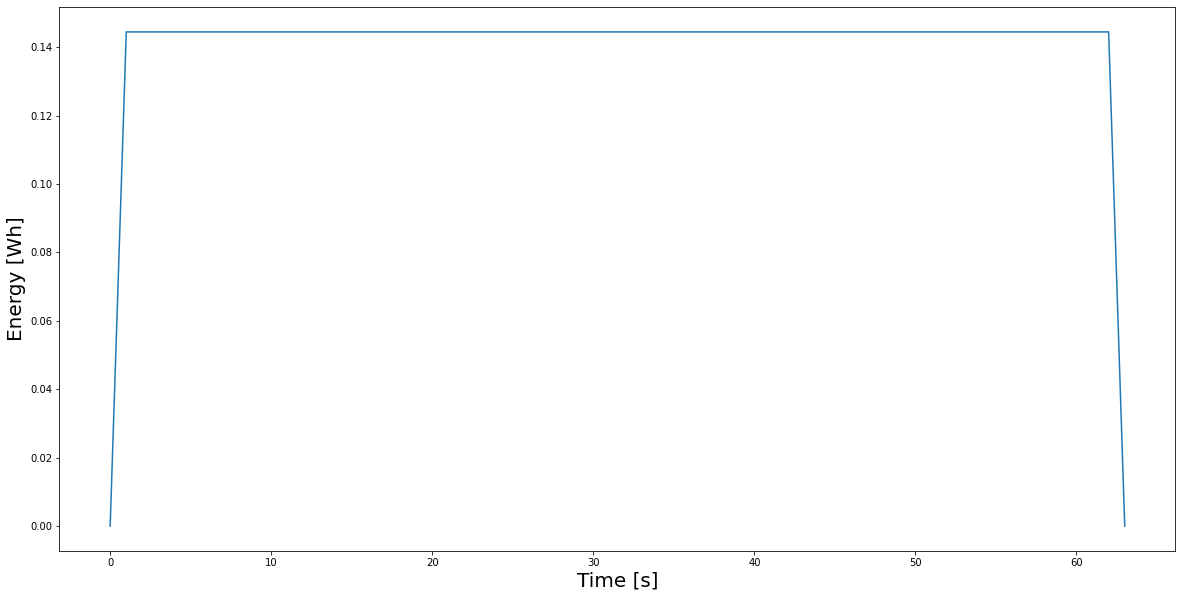

In [47]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Coffee_machine"].iloc[27959:28023].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)

## Dishwasher

In [16]:
(42857 - 33831) / 60 / 60

2.5072222222222225

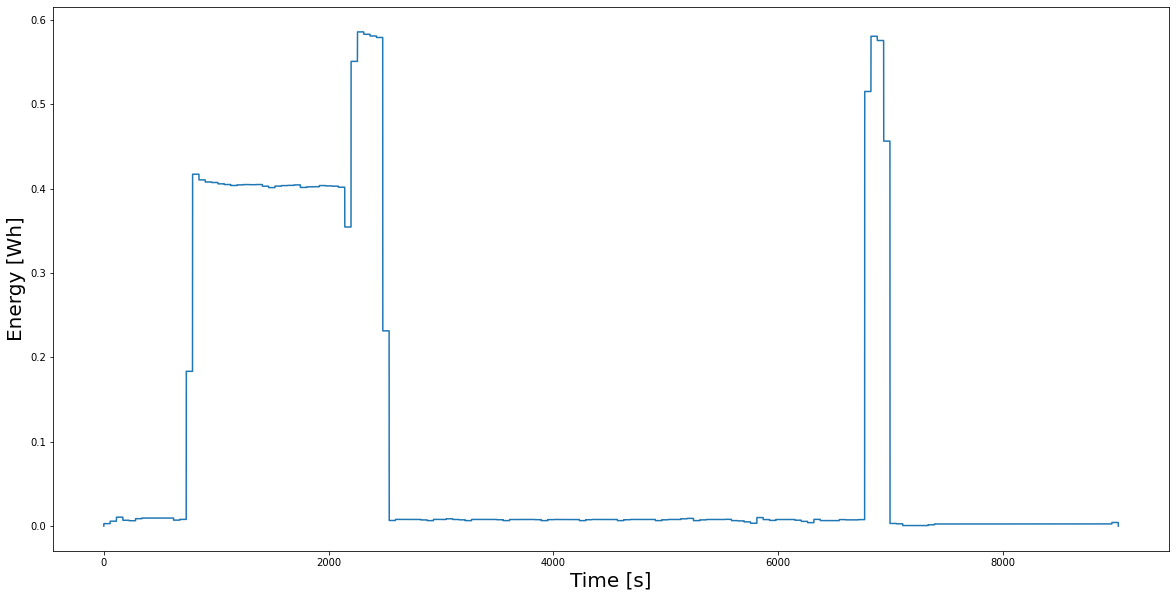

In [48]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Dishwasher"].iloc[33831:42857].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)
plt.savefig("Dishwasher.png", bbox_inches="tight")

## Washing machine

In [18]:
(37972 - 29075) / 3600

2.471388888888889

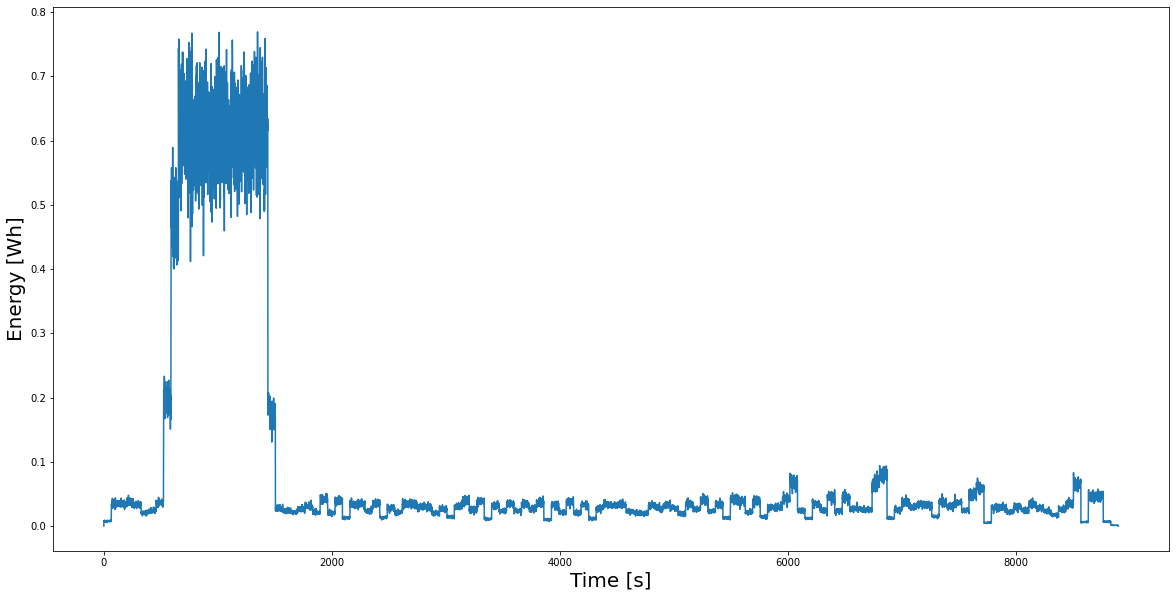

In [49]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Washing_machine"].iloc[29075:37972].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)
plt.savefig("Washing_machine.png", bbox_inches="tight")

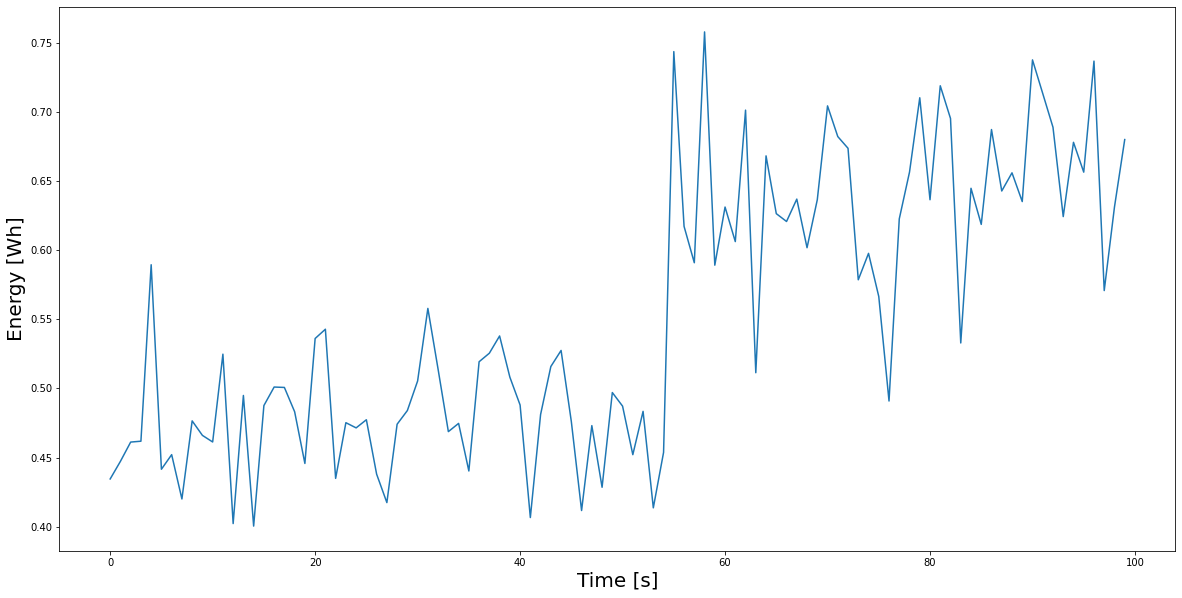

In [50]:
plt.ylabel("Energy [Wh]", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
df["Washing_machine"].iloc[29675:29775].mul(1000).plot(
    y=appliances,
    figsize=(20, 10),
    use_index=False,
)
plt.savefig("Washing_machine_cropped.png", bbox_inches="tight")

# Convert time series data to windowed data frame

In [9]:
window_size = 180
step = 1

In [10]:
windowed_data_path = f"{DATA_PATH}/windowed_{window_size}_step_{step}.csv"

In [11]:
df_timeseries = utils.write_or_load_windows(
    windowed_data_path, df, window_size, step, appliances
)
df_timeseries

Loading existing window file data/test/windowed_180_step_1.csv


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19,sample_20,sample_21,sample_22,sample_23,sample_24,sample_25,sample_26,sample_27,sample_28,sample_29,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39,sample_40,sample_41,sample_42,sample_43,sample_44,sample_45,sample_46,sample_47,sample_48,sample_49,sample_50,sample_51,sample_52,sample_53,sample_54,sample_55,sample_56,sample_57,sample_58,sample_59,sample_60,sample_61,sample_62,sample_63,sample_64,sample_65,sample_66,sample_67,sample_68,sample_69,sample_70,sample_71,sample_72,sample_73,sample_74,sample_75,sample_76,sample_77,sample_78,sample_79,sample_80,sample_81,sample_82,sample_83,sample_84,sample_85,sample_86,sample_87,sample_88,sample_89,sample_90,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,sample_100,sample_101,sample_102,sample_103,sample_104,sample_105,sample_106,sample_107,sample_108,sample_109,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118,sample_119,sample_120,sample_121,sample_122,sample_123,sample_124,sample_125,sample_126,sample_127,sample_128,sample_129,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139,sample_140,sample_141,sample_142,sample_143,sample_144,sample_145,sample_146,sample_147,sample_148,sample_149,sample_150,sample_151,sample_152,sample_153,sample_154,sample_155,sample_156,sample_157,sample_158,sample_159,sample_160,sample_161,sample_162,sample_163,sample_164,sample_165,sample_166,sample_167,sample_168,sample_169,sample_170,sample_171,sample_172,sample_173,sample_174,sample_175,sample_176,sample_177,sample_178,sample_179,Stove,Coffee_machine,Microwave,Dishwasher,Washing_machine
0,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0004876085,1,1,0,0,0
1,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000000000,0.0000000000,0.0000000000,0.0004876085,0.0004876085,1,1,0,0,0
2,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Train-test split

In [12]:
samples = [x for i, x in enumerate(df_timeseries.columns) if x not in appliances]
X = df_timeseries.loc[:, samples]
y = df_timeseries.loc[:, appliances]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42, shuffle=False
)

# Modeling

In [15]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [16]:
X_train.shape

(175000, 180)

In [17]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import AveragePooling1D, Conv1D, MaxPooling1D
from keras.models import Sequential

In [18]:
EPOCHS = 100
BATCH_SIZE = 256

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=5,
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=8, verbose=1, restore_best_weights=True
    ),
]

# Architecture insights
- Best model so far is true_DLO_doppelte_filter_60er_kernel_model with batch size 256, window size 180 with f1 scores between 88-96%, accuracy ~87% and LR at 5e-07
- GlobalMaxPooling seems to improve results on strongly imbalanced classes but worsens performance on "main" classes

In [19]:
from keras.layers import *


def create_model():
    kernel_size = 90

    input_layer = keras.layers.Input(shape=(window_size, 1))

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=kernel_size, padding="same")(
        input_layer
    )
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.BatchNormalization()(conv1)
    max1 = keras.layers.MaxPool1D()(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=kernel_size, padding="same")(
        max1
    )
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.BatchNormalization()(conv2)
    max2 = keras.layers.MaxPool1D()(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=kernel_size, padding="same")(
        max2
    )
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.BatchNormalization()(conv3)
    max3 = keras.layers.MaxPool1D()(conv3)

    conv4 = keras.layers.Conv1D(filters=256, kernel_size=kernel_size, padding="same")(
        max3
    )
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)
    max4 = keras.layers.MaxPool1D()(conv4)

    conv5 = keras.layers.Conv1D(filters=512, kernel_size=kernel_size, padding="same")(
        max4
    )
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.ReLU()(conv5)

    gap = keras.layers.GlobalMaxPooling1D()(conv5)

    dense1 = keras.layers.Dense(512)(gap)
    dense1 = keras.layers.BatchNormalization()(dense1)
    dense1 = keras.layers.ReLU()(dense1)

    output_layer = keras.layers.Dense(len(appliances), activation="sigmoid")(dense1)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [20]:
LR = 0.0000006
optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
f"Setting learning rate to {LR}"

'Setting learning rate to 6e-07'

In [21]:
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [22]:
model = create_model()

In [23]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["AUC", "binary_accuracy"])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 180, 128)          11648     
                                                                 
 re_lu (ReLU)                (None, 180, 128)          0         
                                                                 
 batch_normalization (BatchN  (None, 180, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 128)           147468

In [25]:
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
)

Epoch 1/100
684/684 [==============================] - 78s 91ms/step - loss: 0.4194 - auc: 0.9021 - binary_accuracy: 0.8622 - val_loss: 1.3369 - val_auc: 0.3720 - val_binary_accuracy: 0.3338 - lr: 6.0000e-07
Epoch 2/100
684/684 [==============================] - 62s 91ms/step - loss: 0.2840 - auc: 0.9442 - binary_accuracy: 0.9305 - val_loss: 0.3222 - val_auc: 0.9053 - val_binary_accuracy: 0.9153 - lr: 6.0000e-07
Epoch 3/100
684/684 [==============================] - 61s 89ms/step - loss: 0.2374 - auc: 0.9597 - binary_accuracy: 0.9431 - val_loss: 0.2828 - val_auc: 0.9141 - val_binary_accuracy: 0.9188 - lr: 6.0000e-07
Epoch 4/100
684/684 [==============================] - 60s 87ms/step - loss: 0.2096 - auc: 0.9692 - binary_accuracy: 0.9495 - val_loss: 0.2595 - val_auc: 0.9301 - val_binary_accuracy: 0.9235 - lr: 6.0000e-07
Epoch 5/100
684/684 [==============================] - 59s 86ms/step - loss: 0.1893 - auc: 0.9754 - binary_accuracy: 0.9545 - val_loss: 0.2526 - val_auc: 0.9337 - val_b

In [26]:
df_prediction = pd.DataFrame(model.predict(X_test))
df_prediction

1609/1609 [==============================] - 15s 9ms/step


,0,1,2,3,4
0,0.0131800286,0.0340845846,0.0271662306,0.9761692286,0.0427811109
1,0.0131559996,0.0339731760,0.0270914007,0.9763308167,0.0426663496
2,0.0130503355,0.0338029116,0.0272149388,0.9765536785,0.0425954536
3,0.0130356653,0.0337242000,0.0271205790,0.9766478539,0.0423288234
4,0.0129652722,0.0336440206,0.0271177292,0.9769335389,0.0422791056
...,...,...,...,...,...
51466,0.0266489889,0.0414038748,0.0251211487,0.8997015953,0.0929846689
51467,0.0263562817,0.0414069332,0.0251050964,0.9008890986,0.0928673893
51468,0.0261975098,0.0415683910,0.0250853878,0.9012344480,0.0928111374
51469,0.0259747189,0.0416111872,0.0250260346,0.9028002620,0.0923581868


In [27]:
THRESHOLD = 0.5
y_pred = model.predict(X_test)
y_pred[y_pred >= THRESHOLD] = 1
y_pred[y_pred < THRESHOLD] = 0
y_pred

1609/1609 [==============================] - 15s 9ms/step


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [28]:
test_loss, test_auc, test_acc = model.evaluate(X_test, y_test)

print("Test AUC", test_auc)
print("Test Acc", test_acc)
print("Test loss", test_loss)

1609/1609 [==============================] - 18s 11ms/step - loss: 0.1226 - auc: 0.9723 - binary_accuracy: 0.9678
Test AUC 0.9722564816474915
Test Acc 0.9677846431732178
Test loss 0.12261843681335449


In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.888014610168833

In [30]:
MODEL_NAME = "DLO_128,128,128,256,512_90er_kernel_GlobalMaxPool_model"

In [31]:
model.save(f"{MODEL_PATH}/{MODEL_NAME}/LR={LR},Epochs={EPOCHS},BATCH={BATCH_SIZE}")

INFO:tensorflow:Assets written to: models/test/DLO_128,128,128,256,512_90er_kernel_GlobalMaxPool_model/LR=6e-07,Epochs=100,BATCH=256\assets


INFO:tensorflow:Assets written to: models/test/DLO_128,128,128,256,512_90er_kernel_GlobalMaxPool_model/LR=6e-07,Epochs=100,BATCH=256\assets


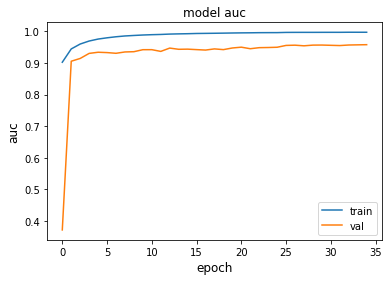

In [32]:
metric = "auc"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.savefig(f"{MODEL_PATH}/{MODEL_NAME}/LR={LR},Epochs={EPOCHS},BATCH={BATCH_SIZE}")
plt.show()
plt.close()

In [33]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, y_pred)

print(
    classification_report(y_test, y_pred, target_names=appliances, zero_division=False)
)

                 precision    recall  f1-score   support

          Stove       0.96      0.97      0.96     23833
 Coffee_machine       0.90      0.91      0.91      3896
      Microwave       0.93      0.86      0.90      3313
     Dishwasher       0.95      0.94      0.94     21728
Washing_machine       0.97      0.70      0.81      8584

      micro avg       0.95      0.91      0.93     61354
      macro avg       0.94      0.88      0.90     61354
   weighted avg       0.95      0.91      0.93     61354
    samples avg       0.97      0.94      0.95     61354



Accuracy: 0.9666608381418663


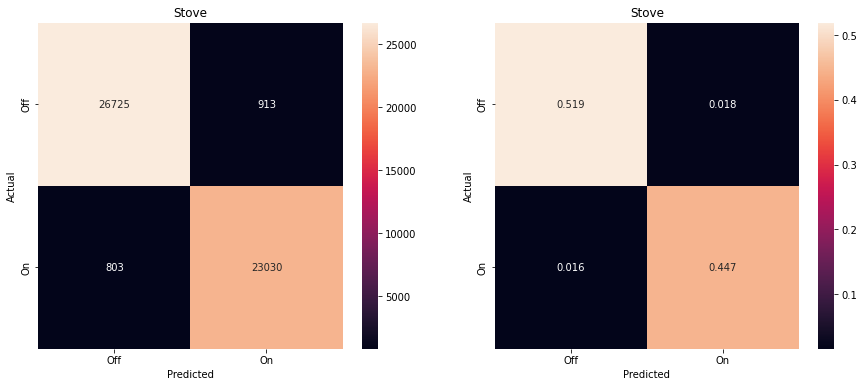

Accuracy: 0.9857006858230849


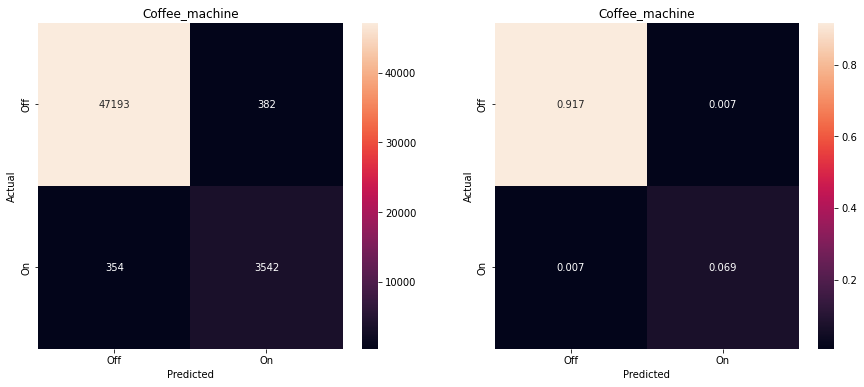

Accuracy: 0.986982961279167


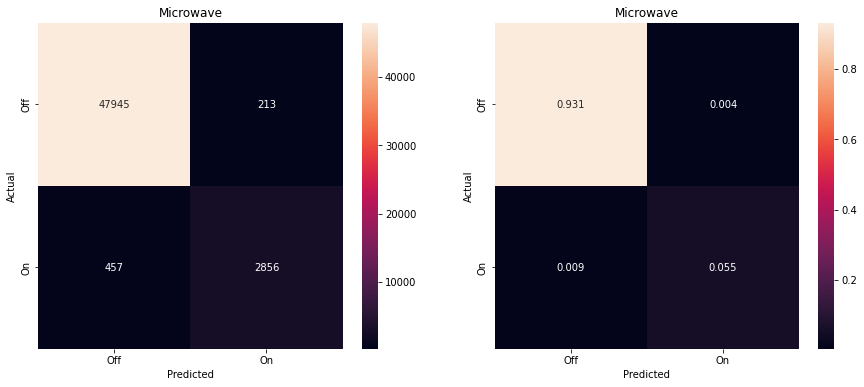

Accuracy: 0.9530026616929922


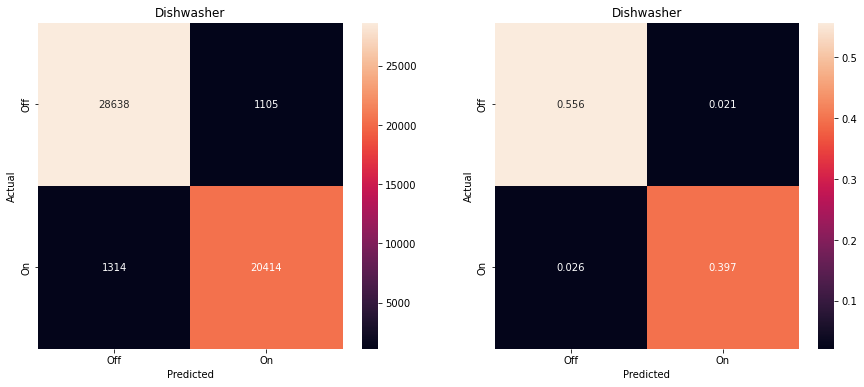

Accuracy: 0.9465718559965806


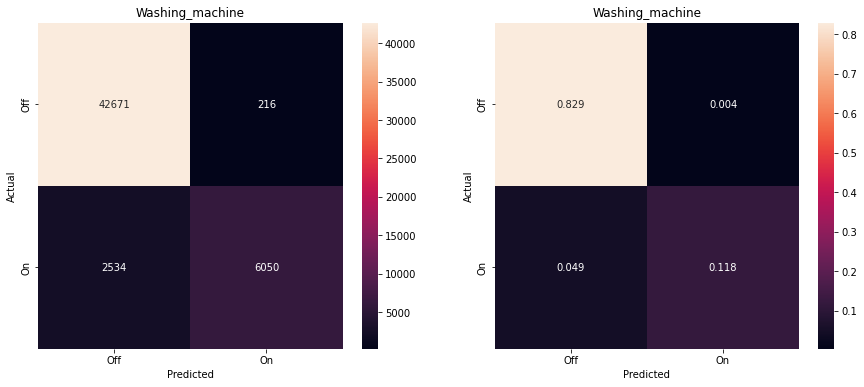

In [34]:
columns = ["Off", "On"]
for idx, item in enumerate(mcm):
    tn, fp, fn, tp = item.ravel()
    print(f"Accuracy: {(tp+tn)/(tn+fp+fn+tp)}")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    heat = sns.heatmap(
        item, annot=True, fmt="1", xticklabels=columns, yticklabels=columns, ax=ax1
    )
    norm_item = item.astype("float") / item.sum(axis=None)
    norm_heat = sns.heatmap(
        norm_item,
        annot=True,
        fmt=".3f",
        xticklabels=columns,
        yticklabels=columns,
        ax=ax2,
    )
    for ax in [ax1, ax2]:
        ax.set_title(appliances[idx])
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    plt.show()